## Analysing topics with hSBM

In order to further explore the content of the collected text files, we deploy a hierarchical stochastic block model (hSBM). This model will allow us to identify topics covered in the Wikipedia-pages and we can, thus, explore patterns the degrees to which social scientists of different disciplines and communities contribute to different topics. Furthermore, we attempt to identify if there are topics that are either characteristic for certain predefined groups, or if there are topics uniting scientists across the social sciences making the traditional boundaries redundant. 

***
**hSBM briefly explained** <br>
The model is used to identify prevalent topics in a text corpora, and it relies on integration of  teqniques used for community detection in networks (Gerlach et al. 2018). hSBM has proven to perform better than the more widely used latent Dirichlet allocation (LDA). Topics can be identified by the hSBM by representing the text corpora as a bipartite network in which nodes are documents and words, and the weight of the edges connecting nodes are determined by word-occurrences in each document. The model automatically detects the relevant number of topics and makes a hierarchical clustering of nodes (ibid.). In the section below, we illustrate the resulting bipartite network and elaborate on the method below.   

We were only able to run the hSBM in Google Colab. The code is attached and it can also be found through the link below. Through the hSBM we identifyied e list of topics and corresponding probabilities for each document to belong to a certain topic. We stored this information in a dataframe to be able to further analyse it in this notebook.


Link to notebook in Google Colab: https://colab.research.google.com/drive/10_H2VPqhq69gVBz0nWEyC8aqVadAq9lc?usp=sharing
Link to folder in Google Colab: https://drive.google.com/drive/folders/11M7ne6PpvLyftIMmKLiVZOoqLdcY018C?usp=sharing

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite
import collections
import netwulf as nw
from IPython.display import Image
import matplotlib

In [3]:
# We read the dataframes with data from hSBM - these datasets were made in the nodebook in Google Colab
topics=pd.read_csv('HSBM_topics_final.csv')
topics.drop('Unnamed: 0', axis = 'columns', inplace = True)
HSBM_probs=pd.read_csv('HSBM_probs_final.csv')
HSBM_probs.drop('Unnamed: 0', axis = 'columns', inplace = True)

**Plotting result of HSBM** <br>
We plot the word-document bipartite network generated thought hSBM. Document-nodes are on the left, and word-nodes are on the right. The nodes of words and documents are grouped on multiple levels. On the highest level (in the center of the graph) all nodes belong to the same group, on the second highest level the network is splot into word- and document-nodes. We are interested in the word-groups as these correspond to topics of the documents. The SBM has a hierarchical structure which implies that topics at the lowest levels (far to the right) contain more granular information about the content of the documents, whereas, topics at higher levels are clusters of the lower level topics and, thus, more aggregate (ref). 

The hSBM generates 397 topics at Level 0, 59 topics at Level 1, 11 topics at Level 2, 2 topics at Level 3, and 1 topic at Level 4. 

The documents on the left side are sorted such that the disciplines appear alphabethically such that anthropologists are the first nodes and the last are sociologists. The number of documents vary within each discipline, and thus we show the order in the table below. From the graph below we can get a sense how some document-nodes seem to cluster in what in some cases might correspond to disciplinary groupings. This is especially prevalent for the cluster document nodes in the bottom which could indicate a sociology group.

In [4]:
# Showing the order and number of documents for each discipline as they appear in the plot below. 
pd.DataFrame(HSBM_probs.groupby(['discipline']).size())

0
discipline              
Anthropologist       149
Economist            825
Multiple              86
Political Scientist  233
Psychologist         299
Sociologist          513

                 Bipartite network of documents and words


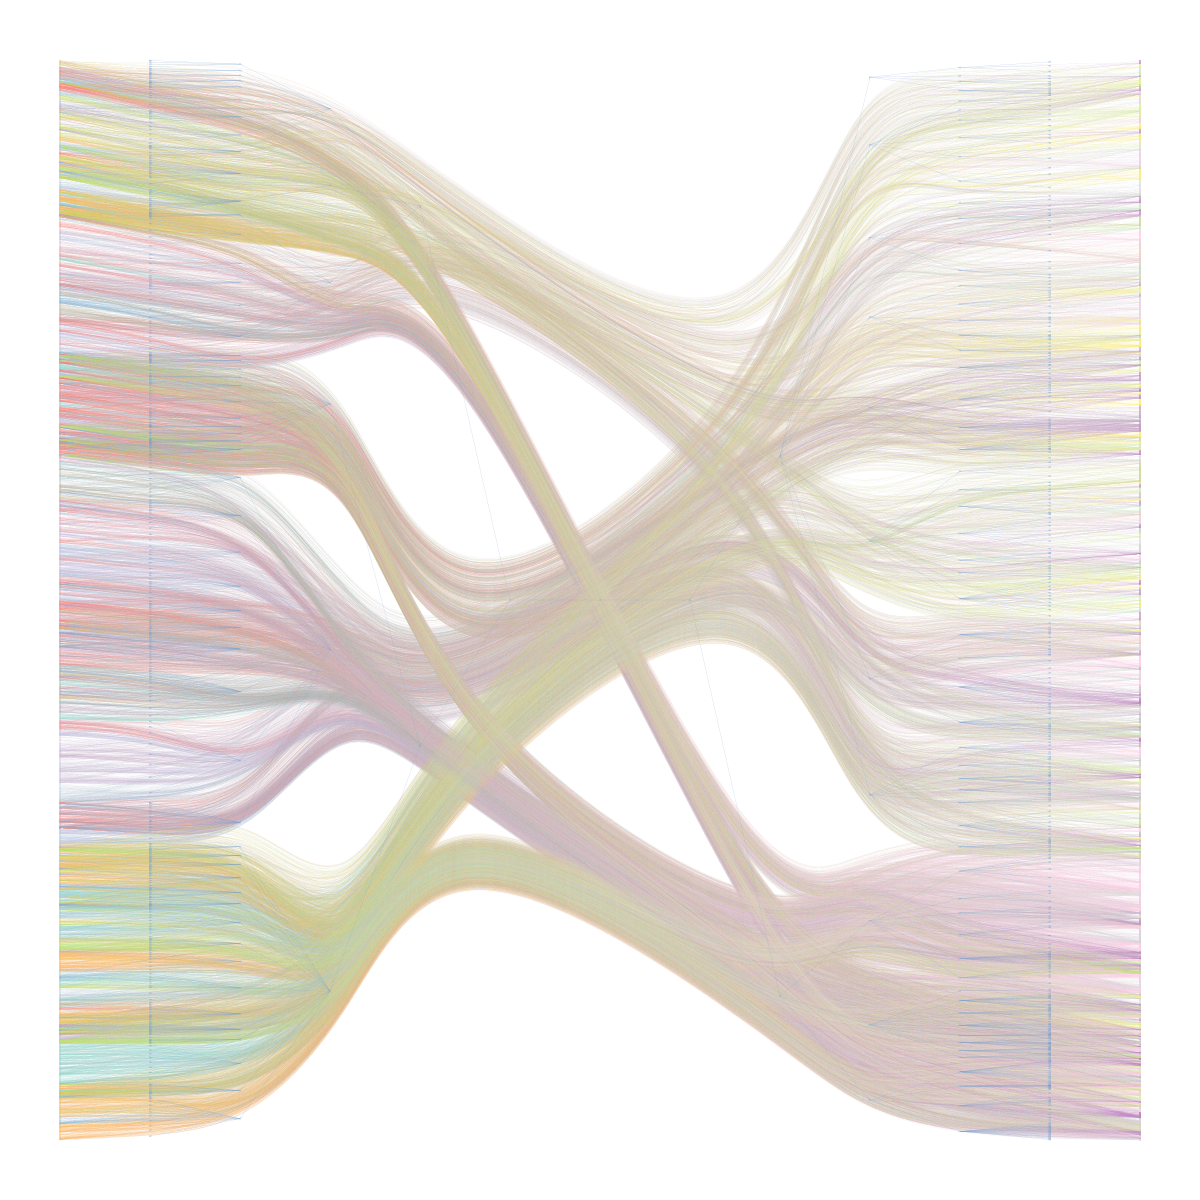

In [4]:
# We show the image of the bipartite network generated through th hSBM. 
print('                 Bipartite network of documents and words')
Image(filename = "hSBM_Topicmodel_04.12.png", width=600, height=600)


***
**Selecting relevant topics** <br>
Nevertheless, can the bipartite network above not be used to infer a lot about the content of the social science documents, and thus, we move on to examine the what the word-groups/topics generated by the model actually contain and we select topics that we deem descriptive and relevant for the task. We choose to work with topics at level 1 which we deem to be the most appropriate level to examine as the topics appear to be reasonably coherent and manageable to manually select from. The full list of topics generated at Level 1 appear in the dataframe below. 

For each of the generated topics, we examine the 10 most probable words in order to select a subset of topics which we assess to be the most interesting to further examine. We draw on a heuristic approach which implies that we select topics that we assess to be semantically coherent and exclusive. Furthermore, we only select topics that we assess to be related to the content of the theoretical contributions of the researchers and we discard topics that appear to be related to academic prestige, timely relevans (topics consisting only of years e.g. Topic 6 and 4), and nationality (topics consisting of city names and words in non-English languages e.g. Topic 26 and 43). We select a subset of 21 topics which we assign appropriate descriptive names in the dictionary below. We create a bar plot of the most important words within each of the selected topics.

In [5]:
'''All topics generated'''
# We show all rows in the dataframe of topics 
pd.set_option("display.max_rows", None, "display.max_columns", None)
topics

Topic      Topic_words  Probability_of_word_in_topic
0        0      information                      0.129238
1        0           health                      0.121458
2        0    communication                      0.093358
3        0          network                      0.087668
4        0              san                      0.045402
5        0        minnesota                      0.036925
6        0              van                      0.036345
7        0       evaluation                      0.021482
8        0        variation                      0.021017
9        0      minneapolis                      0.014166
10       1         analysis                      0.083767
11       1          student                      0.079832
12       1          process                      0.057623
13       1         approach                      0.052088
14       1           method                      0.050854
15       1        structure                      0.047552
16       1        scientist                      0.030446
17       1            focus                      0.029112
18       1         thinking                      0.025177
19       1          applied                      0.024610
20       2              one                      0.085910
21       2             many                      0.039139
22       2             much                      0.019716
23       2        according                      0.018976
24       2             like                      0.017177
25       2           become                      0.016922
26       2       considered                      0.015429
27       2          subject                      0.015352
28       2             took                      0.014867
29       2            point                      0.014523
30       3                –                      0.045171
31       3             time                      0.044816
32       3           became                      0.027293
33       3           family                      0.018998
34       3            wrote                      0.018604
35       3            known                      0.017647
36       3             well                      0.017392
37       3            early                      0.017361
38       3             part                      0.016936
39       3             view                      0.016898
40       4             1919                      0.030428
41       4             1920                      0.030428
42       4             1921                      0.025328
43       4             1912                      0.022777
44       4             1913                      0.022425
45       4             1915                      0.021282
46       4             1916                      0.019260
47       4             king                      0.015918
48       4             1902                      0.015478
49       4         commerce                      0.015038
50       5           member                      0.083111
51       5         national                      0.081484
52       5            board                      0.034424
53       5             free                      0.032492
54       5             june                      0.031856
55       5          january                      0.031246
56       5            april                      0.028907
57       5        committee                      0.026924
58       5         february                      0.026797
59       5            named                      0.023492
60       6            press                      0.117597
61       6             2006                      0.028340
62       6             2007                      0.027954
63       6             2004                      0.026683
64       6             2005                      0.026333
65       6             2011                      0.026296
66       6             2002                      0.023755
67       6             2012                      0.023405
68 

In [30]:
'''All topics selected'''
#We create a dictionary with a number with the selected topic as key and value
topic_dict={'7':'Child/Mother Relations',
           '8':'Anthropology',
           '12':'State Administration',
           '14':'History and Society',
           '16':'Government Policy',
           '19':'Finance',
            '20':'Human Experience',
            '21':'World Order GANON',
            '22':'Culture',
            '24':'Power Relations',
            '25':'Effects and correlations',
            '27':'Philosophy',
            '34':'Religious Movements',
            '38':'Democratic Policy-making',
            '42':'Economics',
            '48':'Gender and Race',
            '49':'Sociology',
            '52':'Cognition',
            '55':'Government Systems',
            '56':'Market Mechanisms',
            '58':'Psychology'}

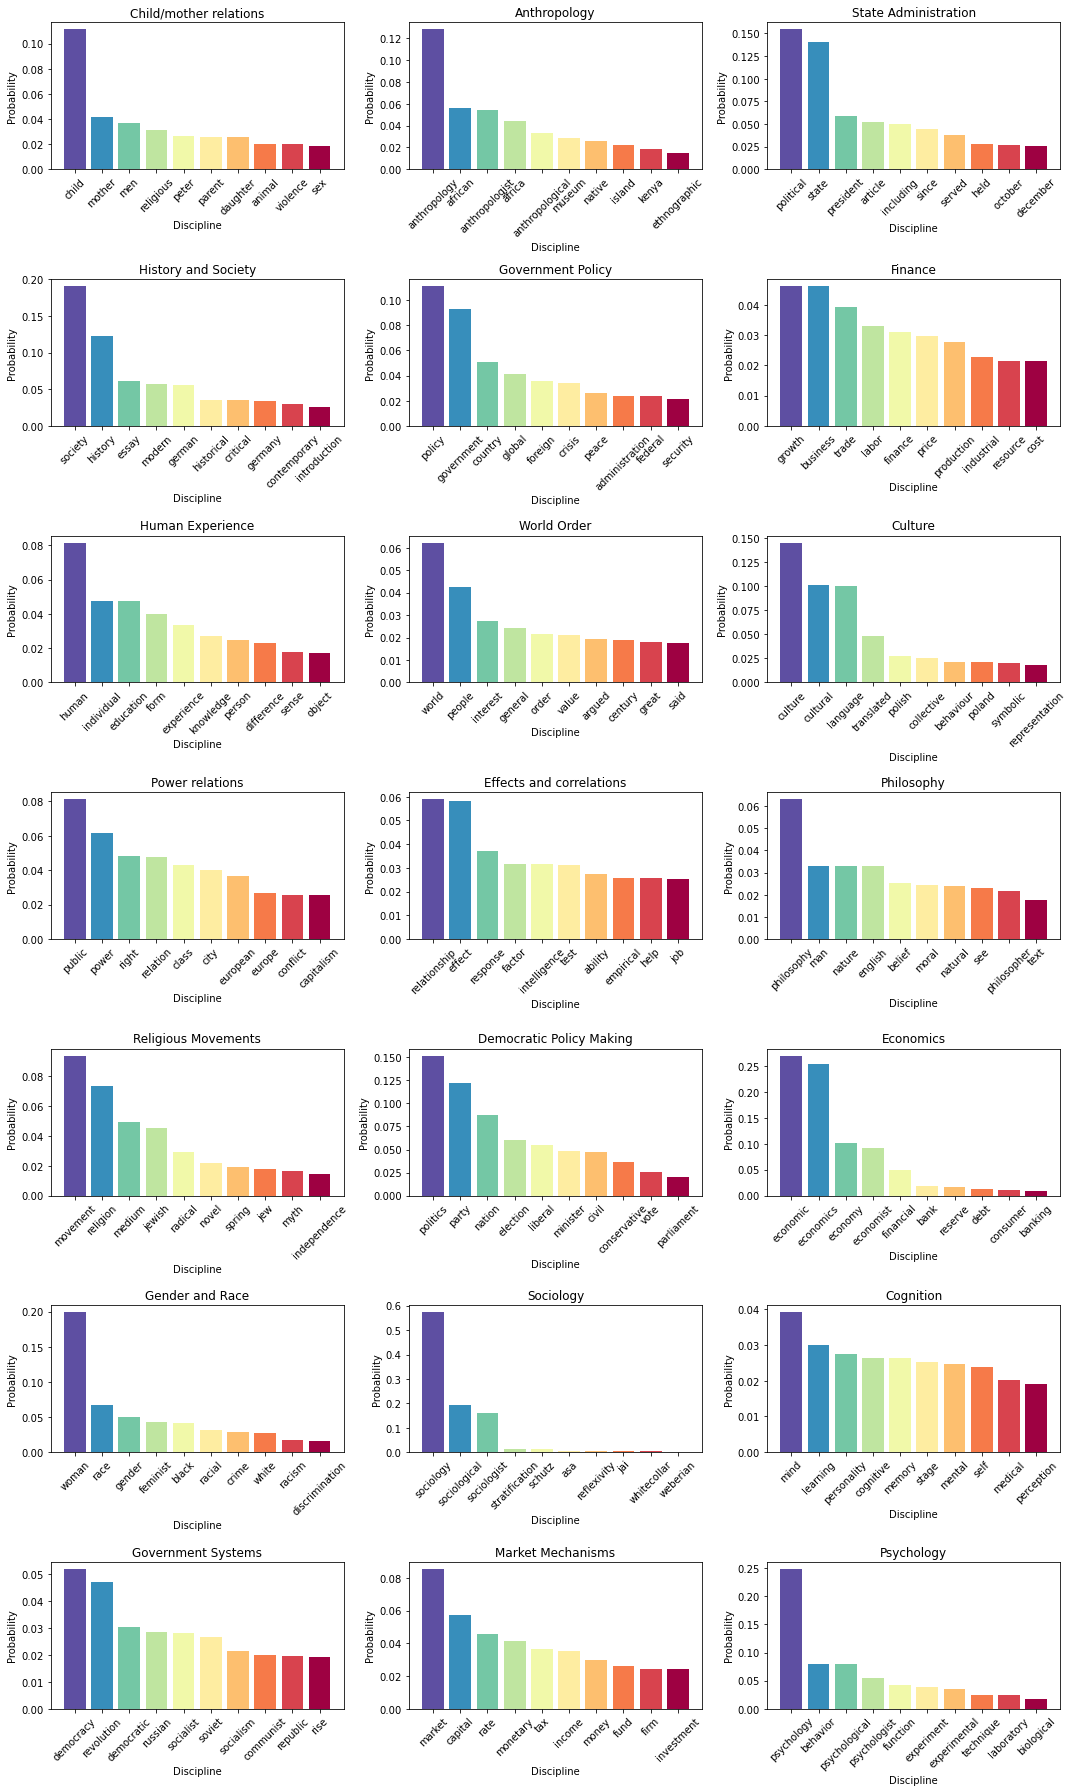

In [6]:
''' We create a bar plot of the most important words within each of the selected topics '''

# We define the colors
''' Set color to the same cmap as the reset of the assignment  '''
n_words = 10 # how many are there? how many colors do we need?

# Give each community a color 
color = [matplotlib.colors.rgb2hex(plt.cm.Spectral_r((_num/(n_words-1))))\
                       for _num in range(n_words)]

# We make subplots 
fig, ax = plt.subplots(7, 3, figsize=(15, 25))

# We loop over each topic, topic_nr and index
for topic_nr,topic,i in zip(topic_dict.keys(),topic_dict.values(),range(len(topic_dict.values()))):
    
    # Based on the index of the topic we create the axis-variable defining the position of the plot
    if i<3:
        axis=ax[0,i]        
    if i>=3 and i<6:
        i = i-3
        axis=ax[1,i]
    if i>=6 and i<9:
        i = i-6
        axis=ax[2,i]
    if i>=9 and i<12:
        i=i-9
        axis=ax[3,i]        
    if i>=12 and i<15:
        i =i-12
        axis=ax[4,i]
    if i>=15 and i<18:
        i=i-15
        axis=ax[5,i]        
    if i>=18:
        i =i-18
        axis=ax[6,i]
    
    # We create a bar plot for each topic with a bar showing probability for each word in the topic
    axis.bar(list(topics[topics['Topic']==int(topic_nr)]['Topic_words']),
             list(topics[topics['Topic']==int(topic_nr)]['Probability_of_word_in_topic']),color=color)
    
    #We set title and labels
    axis.set_title(topic)
    axis.set_xlabel('Discipline')
    axis.set_ylabel('Probability')
    axis.tick_params(axis='x', labelrotation = 45)
    fig.tight_layout()
    
plt.savefig('../Plots/topics_barplots.png', dpi=200, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

***
# Topics within disciplines and communities
<br> After having examined and selected a subset of topics generated by the hSBM, we move on to find the distribution of each selected topic within the disciplines and the communities. For the rest of the assignment, we focus on the selected 21 topics. 

We examine which topics are most prevalent across social sciences by creating bar plots that show the degree to which each discipline and community contribute to each topic. We do this by aggregating the topic-probabilities of each social scientists by respectively discipline and community. 

In [31]:
# We subset the dataframe of topic probabilities for each document to contain only the selected topics
HSBM_probs_topics=HSBM_probs[['name','discipline','community','text']+list(topic_dict.keys())]

# We rename the topics to the ascribed titles
HSBM_probs_topics=HSBM_probs_topics.rename(columns=topic_dict)

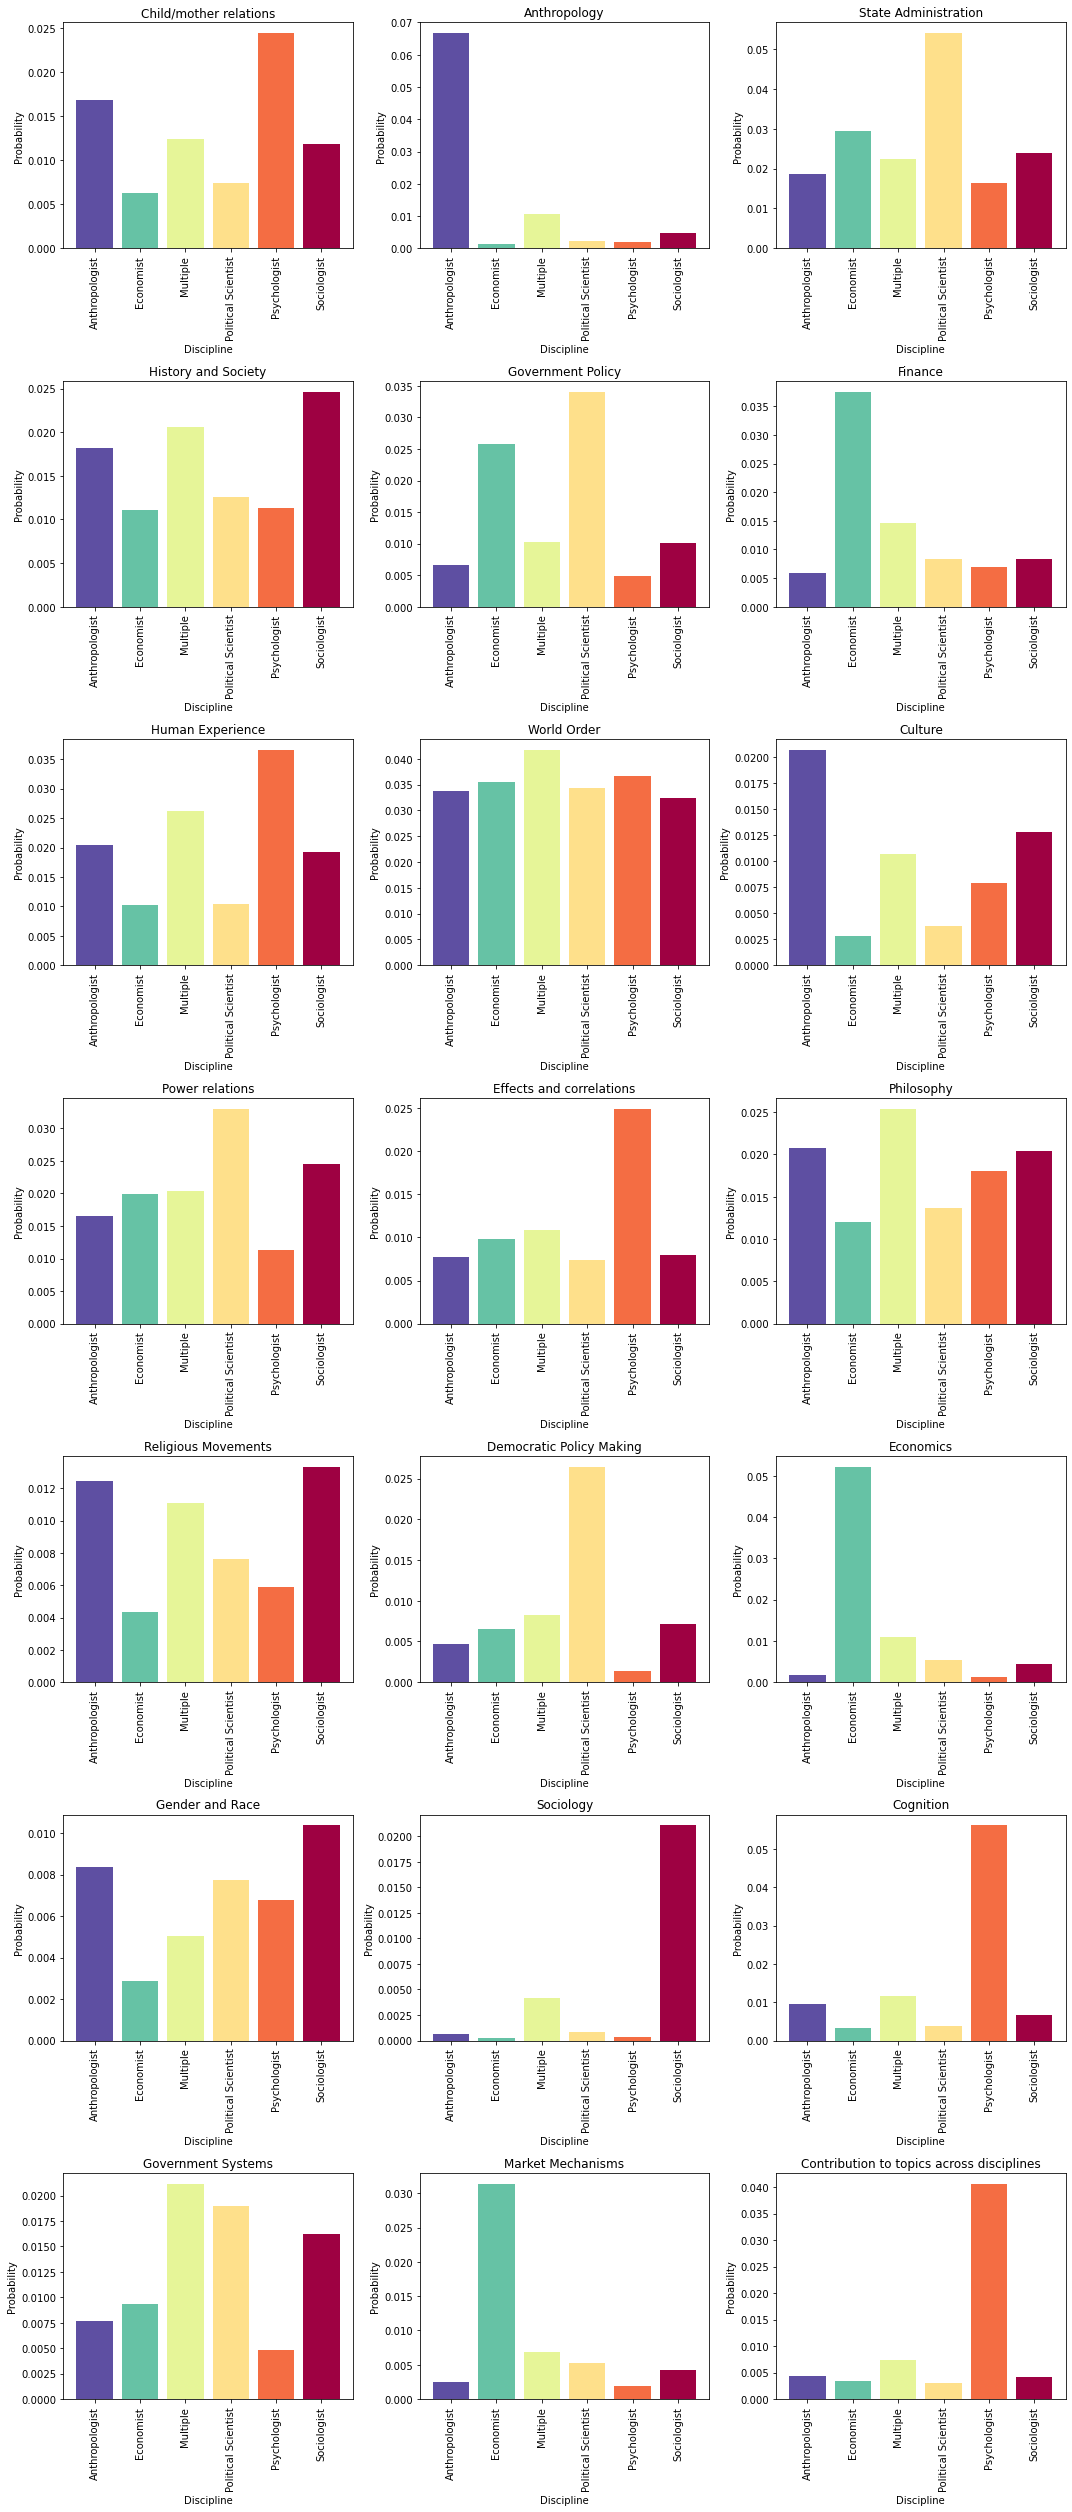

In [30]:
'''We create bar plots for each topic showing that show contributions from all disciplines'''

# We group all document by the disciplines, they belong to. 
HSBM_probs_discipline=HSBM_probs_topics.groupby('discipline',as_index=False).mean()

''' Set color to the same cmap as the rest of the assignment  '''
communities = list(HSBM_probs_discipline.index)
n_community = len(communities) # how many are there? how many colors do we need?

# Give each community a color 
color = [matplotlib.colors.rgb2hex(plt.cm.Spectral_r((_num/(n_community-1))))\
                       for _com, _num in zip(communities, range(n_community))]

# We make subplots 
fig, ax = plt.subplots(7, 3, figsize=(15, 35))

# We loop over each topic 
for i,topic in enumerate(HSBM_probs_discipline.columns[1:]):
    if i<3:
        axis=ax[0,i]        
    if i>=3 and i<6:
        i = i-3
        axis=ax[1,i]
    if i>=6 and i<9:
        i = i-6
        axis=ax[2,i]
    if i>=9 and i<12:
        i=i-9
        axis=ax[3,i]        
    if i>=12 and i<15:
        i =i-12
        axis=ax[4,i]
    if i>=15 and i<18:
        i=i-15
        axis=ax[5,i]        
    if i>=18:
        i=i-18
        axis=ax[6,i]

    # We create a bar plot for each topic 
    axis.bar(HSBM_probs_discipline.discipline,HSBM_probs_discipline[topic],color=color)
    axis.set_title(topic)
    axis.set_xlabel('Discipline')
    axis.set_ylabel('Probability')
    axis.tick_params(axis='x', labelrotation = 90)
    fig.tight_layout()
    
plt.savefig('../Plots/Disciplines_topics_barplots.png', dpi=200, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

***
**Contribution to topics across disciplines** <br>
From the bar plots above, we infer that the contributions from each discipline vary a lot dependent of the specific topic: Some topics have scientists from just one discipline as main contributors. This is especially true for the topics with titles similar to the disciplines e.g., Sociology, Anthropology, Economics, and Psychology. Furthermore, for the topics “Market Mechanisms”, “Democratic Policy-making”, and “Cognition”, it appears that respectively economists, political scientists, and psychologist are main contributors. <br>

Other topics seems to unite scientists from different disciplines pairwise (and here we do not consider the “multiple” category): “History and Society” has anthropologists and sociologists as main contributors, “Government Policy” unites economists and political scientists, and “Government Systems” unites sociologists and political scientists. <br>

Lastly, there are topics that seems to be shared more equally between researchers across researchers from three or more disciplines. These are topics such as “Philosophy”, “Gender and Race”, “Power Relations”, and the topic “World Order” seems to be prevalent as a highly popular topic across all social science disciplines.


In [32]:
# We load a dictionary containing sizes of each community. 
with open("../com_size_dict.json", "r", encoding = "utf-8") as f:
    com_size_dict = json.load(f)

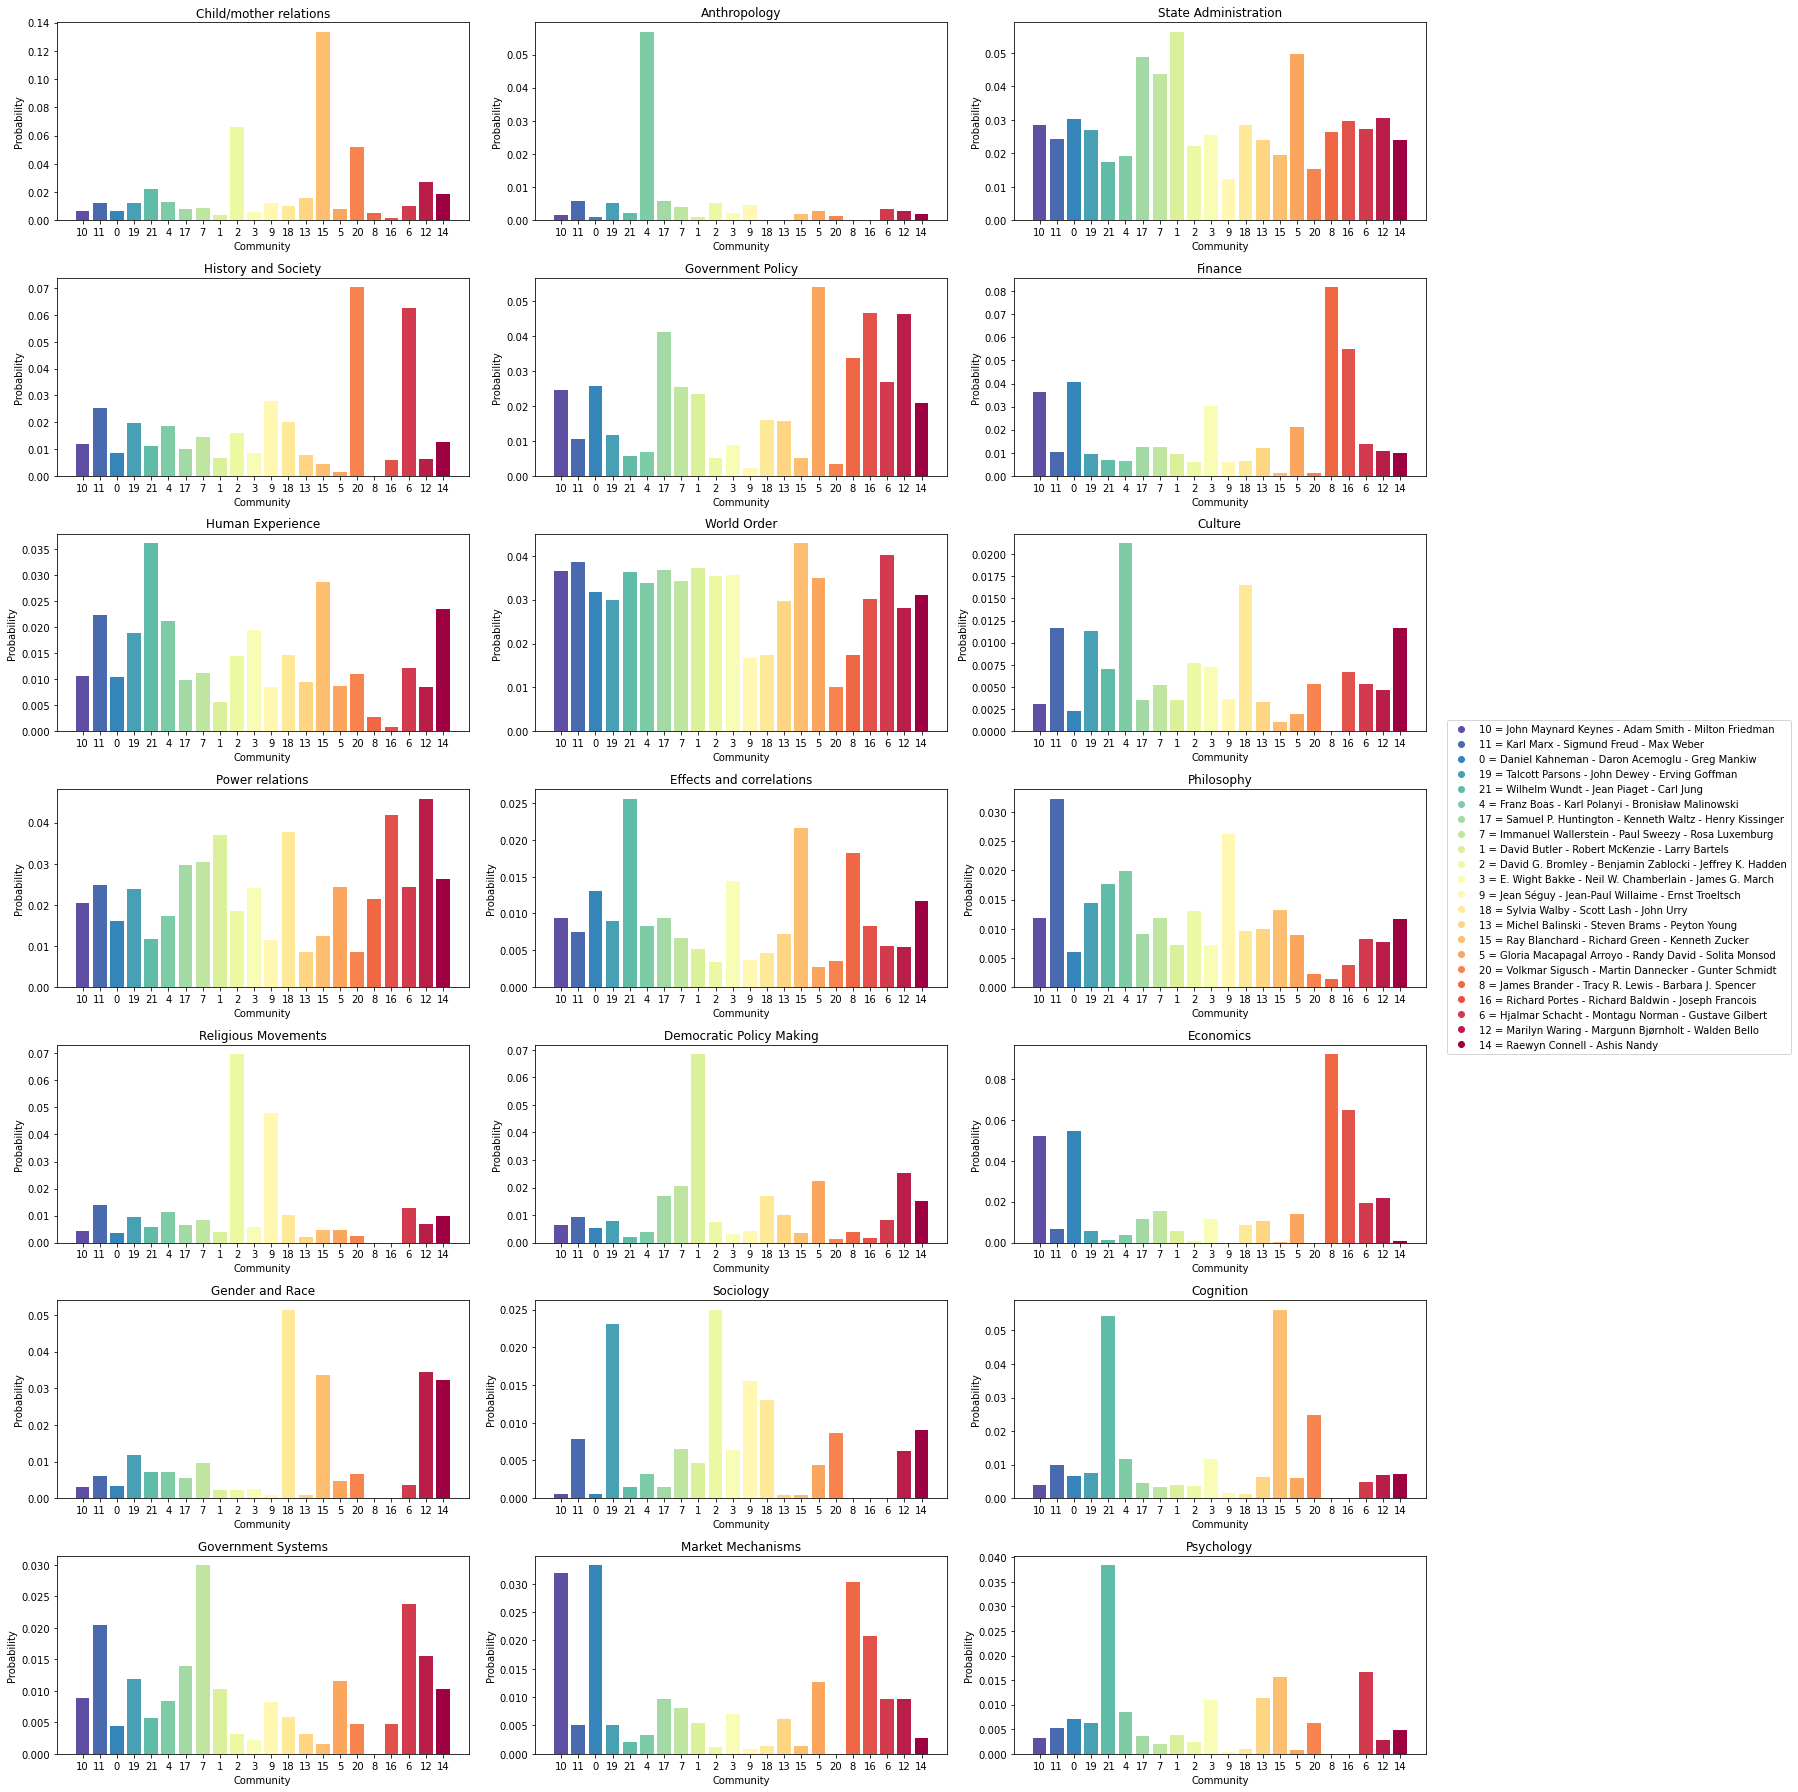

In [9]:
  '''Showing distribution of topic for all Communities'''
# We group all document by the communities,we have identified. 
HSBM_probs_community=HSBM_probs_topics.groupby('community',as_index=False).mean()
# Community size 
_com_dict = HSBM_probs_community.community.to_dict()
# Column with community size 
HSBM_probs_community['com_size'] = HSBM_probs_community.community.apply(lambda x: com_size_dict[x])
# sort based on community size 
HSBM_probs_community.sort_values('com_size', ascending = False, inplace = True)
# convert index to string - otherwise .bar() sorts based on the numerical value 
HSBM_probs_community.index = HSBM_probs_community.index.astype(str)
HSBM_probs_community.drop(columns = ['com_size'], inplace = True)

''' Set color to the same cmap as the rest of the assignment  '''
communities = list(HSBM_probs_community.index)
n_community = len(communities) # how many are there? how many colors do we need?

# Give each community a color 
color = [matplotlib.colors.rgb2hex(plt.cm.Spectral_r((_num/(n_community-1))))\
                       for _com, _num in zip(communities, range(n_community))]

# We make subplots 
fig, ax = plt.subplots(7, 3, figsize=(20,25))

# We loop over each topic 
for i,topic in enumerate(HSBM_probs_community.columns[1:]):
    if i<3:
        axis=ax[0,i]        
    if i>=3 and i<6:
        i = i-3
        axis=ax[1,i]
    if i>=6 and i<9:
        i = i-6
        axis=ax[2,i]
    if i>=9 and i<12:
        i=i-9
        axis=ax[3,i]        
    if i>=12 and i<15:
        i =i-12
        axis=ax[4,i]
    if i>=15 and i<18:
        i=i-15
        axis=ax[5,i]        
    if i>=18:
        i =i-18
        axis=ax[6,i]    
    

    # We create a bar plot for each topic showing the contributions to the topic for each community 
    axis.bar(HSBM_probs_community.index, HSBM_probs_community[topic], color = color)
    axis.set_title(topic)
    axis.set_xlabel('Community')
    axis.set_ylabel('Probability')
    axis.set_xticks(range(22))
    fig.tight_layout()

# Add legends
for _c, _com in zip(color, HSBM_probs_community.index):
    plt.plot([],[], 
                color = _c,
               label=f"{_com} = {_com_dict[int(_com)]}",
                marker=".",
                linestyle="None",
                markersize = 12)

plt.legend(bbox_to_anchor = (1.9,5.25))
plt.savefig('../Plots/Communities_topics_barplots.png', dpi=200, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

***
**Contribution to topics across communities**<br>
In our examination of the plots above, we mainly consider the largest communities, that we have also previously described. The x-axis in the plots is sorted such that the largest communities are on the left. From the plots, we infer that the second largest community of “Marx, Freud, and Weber”, is the main contributor to the topic “Philosophy”. We have earlier described this as an interdisciplinary community characterized by being engaged with philosophy and hermeneutics, and thus the association with this topic is not surprising. <br><br>
Furthermore, the two communities of respectively “Keynes, Smith, and Friedman” and “Kahneman, Acemoglu, and Mankiw” do not differ significantly in their contributions to the topics, and they seem to mainly engage with topics related to economy. This also consistent with our analysis of the communities based on the TF-IDF, however, the topic analysis does not reveal differences between the communities. <br><br> 
For the community of “Parsons, Dewey, and Goffman”, we can only infer from the topic distribution plots that is contributes to the topic “Sociology”, which is also agrees with our earlier findings. Likewise, the community of “Wundt, Piaget, and Jung” are among the main contributors to the topics “Psychology”, “Cognition”, “Human Experience”, and “Effects and Correlations”, which is also consisting with our earlier description of the community as consisting mainly of psychologists who are engaged with experiments and cognition. However, the community does not seem to contribute significantly to the topic that has to do with children, “Child/Mother Relations”, despite what found in the TF-IDF. <br><br>
The community of “Boas, Polanyi, and Malinowski” contributes to the topics “Culture” and “Anthropology”. As we have earlier described, this community contains mainly of anthropologists who are concerned with studies of indigenous people, and thus their contribution to these specific topics is likewise what we expected. <br><br>
The community of “Huntingtin, Waltz, and Kissinger” are main contributors to the topics “Government Policy” and “State Administration”. This community consists of political scientists, and we have earlier described the community as being concerned with international conflicts, and thus, it seems likely that scientists within this community are concerned with these topics as well. <br><br>
Furthermore, the topic “World Order” is also interesting in the topical distribution across communities, as all communities contribute to the topic to a quite large degree. Thus, the topic unites scientists from all disciplines and all communities.


***
## Bipartite networks with scientists and topics
In order to further examine the contributions to topics across disciplines and communities, we create a bipartite network in which we include scientists-nodes and topic-nodes. A scientist- and a topic-node are connected if the probability of the scientist’s document to be connected to the specific topic is higher than 0. These probabilities were generated through the hSBM. Furthermore, the probabilities connecting the nodes correspond to weights of the edges in the bipartite network.
<br><br>
We create bipartite networks where we color the scientist-nodes and edges by discipline and by community. We both create bipartite networks where we include all edges. This will result in dense networks, as the documents have probabilities larger than 0 of belonging to the majority of the topics. However, these probabilities differ in size, and in order to generate a more informative and meaningful network, we utilize the weight attributes of the edges and only include edges with weights above the upper quartile.
<br><br>
These bipartite networks allow us to further explore how scientists contribute to topics, and examine clusters of both scientist- and topic-nodes. 


In [38]:
'''We initiate a bipartite network with weigthed edges'''
# We create a dictionary from the dataframe with topic probablities 
HSBM_dict = HSBM_probs_topics.set_index('name').to_dict()

# We get all topics and persons - the node in the bipartite network
all_topics = list(HSBM_probs_topics.columns)[4:]
all_pers = HSBM_probs_topics['name']
# Make list of link sets
link_set = [(pers, topic) for pers in all_pers for topic in all_topics if HSBM_dict[topic][pers]!=0]

# We create a dictionary with edge weights 
link_weights = {(pers, topic):HSBM_dict[topic][pers] for pers in all_pers for topic in all_topics if HSBM_dict[topic][pers]!=0}

# We create network
G_bi=nx.Graph()
G_bi.add_nodes_from(all_pers,bipartite=0)
G_bi.add_nodes_from(all_topics,bipartite=1)
G_bi.add_edges_from(link_set)

# We Set weights 
nx.set_edge_attributes(G_bi, link_weights, name = "weight")

# We assign note attribute to the nodes based on whether they are nodes 'group'=0 or topics 'group'=1
node_attr = {n:d["bipartite"] for n,d in G_bi.nodes(data=True)}
nx.set_node_attributes(G_bi, node_attr, name="group")

In [39]:
'''We define configurations for the network that create the nicest plot  '''

configurations= {'zoom': 1.1,
 'node_charge': -45,
 'node_gravity': 0.8487806050868936,
 'link_distance': 15,
 'scale_node_size_by_strength': True,
 'node_size': 13.474511789464156,
 'node_stroke_width': 0,
 'node_size_variation': 0.3218667971578566,
 'link_width_variation': 0.5}

# We initiate the network through netwulf 
network,config= nw.visualize(G_bi, plot_in_cell_below=False,config=configurations)

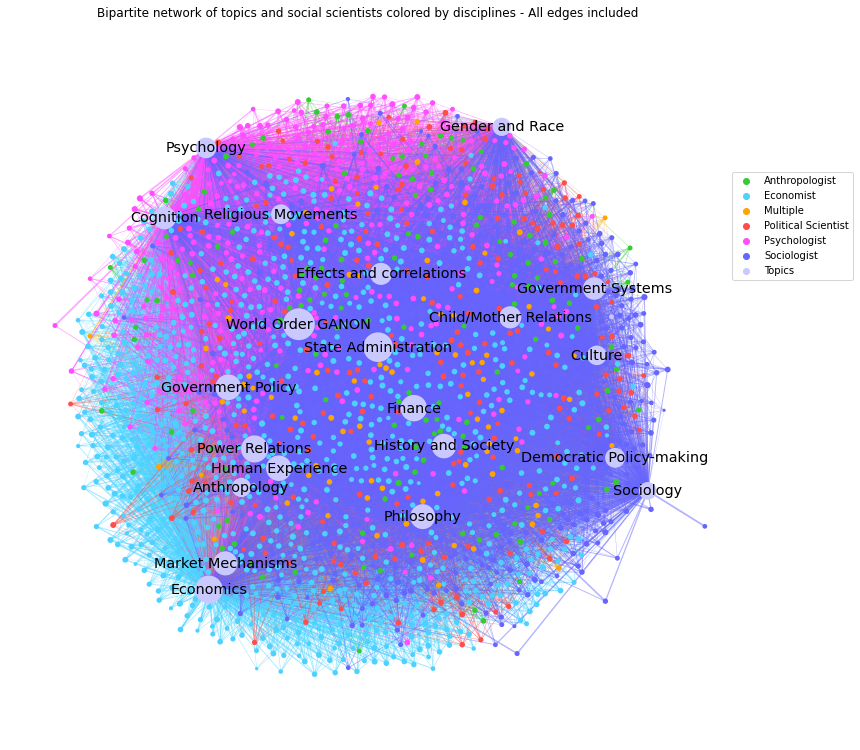

In [40]:
'''We assign colors to scientist-nodes based on discipline and visualize the network with all edges'''

# We define a color value map with a unique color for each discipline 
val_map = {'Sociologist':"#6666ff",
           'Anthropologist':"#33cc33",
           'Multiple':"#ffa500",
           'Political Scientist':"#ff4d4d",
           'Psychologist': '#ff4dff',
           'Economist': '#4dd2ff',
          'Topics':'#c9c9ff'}

# We loop over the scientist-nodes in the network that are not Topic-nodes to assign color 
for i in range(len(network['nodes'])-22):
    # We assign color based on the value map and the discipline for the node
    c=val_map[HSBM_probs_topics['discipline'][i]]
    network['nodes'][i].update({'color':c})
    
# We loop over topic nodes to assign color
for i in range(len(network['nodes'])-22,len(network['nodes'])):
    c = val_map['Topics']
    network['nodes'][i].update({'color':c})
    
# We loop over all links. 
for _link in range(len(network['links'])):
    edge_couple = network['links'][_link] # select edge couple
    scientist = edge_couple['source'] # source should always be the scientist.
    i=HSBM_probs_topics[HSBM_probs_topics['name']==scientist].index.values[0]
    
    # The source link is a scientist and link-color is assigned based on the color value map
    c=val_map[HSBM_probs_topics['discipline'][i]] 
    network['links'][_link].update({'color':c})
    
fig, ax = nw.draw_netwulf(network, figsize = 10)

# Adding labels to Topics 
for i in range(len(network['nodes'])-21,len(network['nodes'])):
    nw.tools.add_node_label(ax,network,network['nodes'][i]['id'],size='x-large')
    
# Add legends
for v in sorted(val_map.keys()):
    plt.scatter([],[],color=val_map[v], 
                label=v, 
                marker='o',
                linestyle="None")
# Place legend
plt.legend(bbox_to_anchor = (1,0.8))
plt.title('Bipartite network of topics and social scientists colored by disciplines - All edges included')
plt.savefig('../Plots/Bipartite_dis_all.png', dpi=200, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

In [41]:
## We set new configurations and adjust the 'min_link_weight_percentile' to show the edges weights within the upper quartile 
configurations_weights= {'zoom': 1.1,
 'node_charge': -45,
 'node_gravity': 0.8487806050868936,
 'link_distance': 15,
 'scale_node_size_by_strength': True,
 'node_size': 13.474511789464156,
 'node_stroke_width': 0,
 'node_size_variation': 0.3218667971578566,
 'min_link_weight_percentile': 0.75}

#We initiate a new network with Netwulf - 
# Note that the min_link_weight_percentile has to be manually adjusted as this configuration is not otherwise working 
network_high_weights,config=nw.visualize(G_bi, plot_in_cell_below=False,config=configurations_weights)

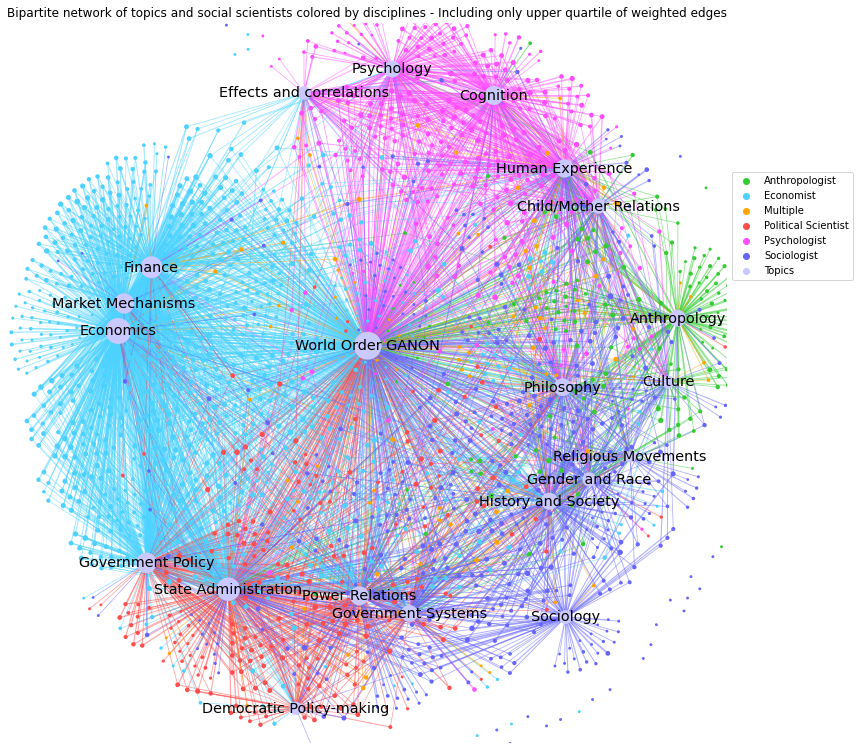

In [43]:
# We set colors for links, scientist nodes, and topic nodes
for i in range(len(network_high_weights['nodes'])-22):
    c=val_map[HSBM_probs_topics['discipline'][i]]
    network_high_weights['nodes'][i].update({'color':c})

for i in range(len(network_high_weights['nodes'])-22,len(network_high_weights['nodes'])):
    c = val_map['Topics']
    network_high_weights['nodes'][i].update({'color':c})
    
for _link in range(len(network_high_weights['links'])):
    edge_couple = network_high_weights['links'][_link] # select edge couple
    scientist = edge_couple['source'] # source should always be the scientist.
    i=HSBM_probs_topics[HSBM_probs_topics['name']==scientist].index.values[0]
    c=val_map[HSBM_probs_topics['discipline'][i]] 
    network_high_weights['links'][_link].update({'color':c})
    
fig, ax = nw.draw_netwulf(network_high_weights, figsize = 10)

# Adding labels to Topics 
for i in range(len(network_high_weights['nodes'])-21,len(network_high_weights['nodes'])):
    nw.tools.add_node_label(ax,network_high_weights,network_high_weights['nodes'][i]['id'],size='x-large')
    
# Add legends
for v in sorted(val_map.keys()):
    plt.scatter([],[],color=val_map[v], 
                label=v, 
                marker='o',
                linestyle="None")
# Place legend
plt.legend(bbox_to_anchor = (1,0.8))
plt.title('Bipartite network of topics and social scientists colored by disciplines - Including only upper quartile of weighted edges')
plt.savefig('../Plots/bipartite_dis_up.png', dpi=200, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

***
**Sofie er nået hertil**

The first bipartite network is very dense and has a hairball-like structure. Though, we are able to identify disciplinary clusters of psychologists, economists, and sociologists close to the corresponding topic-nodes, “Psychology”, “Sociology”, and “Economics”, the rest of the topics appear to cluster randomly in the middle of the network. 

The second bipartite network containing only edges with the highest weights on the other hand reveal more clear patterns.


topics er placeret i relation til hinanden alt efter, hvordan de er forbundne. clusters of discipline nodes. kommenter singletons i 2. version. Ikke meget værdi det første. Overlappene er tydelige, de er i grænsefelter og har mange farver forbundet til sig.




## Communities

In [44]:
''' Recolor nodes and links in bipartite network based on a HSBM_probs_topics-dataframe and colormap '''

def redefine_attr(network, df, _cmap = plt.cm.Spectral_r):
    import copy
    import matplotlib

    community = set(df['community']) # the attribute classes
    n_community = len(community) # how many are there? how many colors do we need?

    attr_scale_dict = {_cat:_num/(n_community-1) for _cat, _num in zip(community, range(n_community))}
    
    # Copy dict - deep copy as the values are nested in a list
    new_nw = copy.deepcopy(network)
    
    # Looping over all nodes 
    for node_nr in range(len(new_nw['nodes'])):
        if node_nr <=len(new_nw['nodes'])-22:
    #             node = network['nodes'][node_nr]['id'] # node id 
            attr=df['community'][node_nr] # get the attribute class of the node
            num_attr = attr_scale_dict[attr] # get the numerical 
            _cmap_color = _cmap(num_attr)
            # overwrite node color based on new attr
            new_nw['nodes'][node_nr]['color'] = matplotlib.colors.rgb2hex(_cmap_color)
        if node_nr >=len(new_nw['nodes'])-21:
            new_nw['nodes'][node_nr]['color']='#c9c9ff'
            

    for _link in range(len(network['links'])):
        edge_couple = network['links'][_link] # select edge couple
        scientist = edge_couple['source'] # source should always be the scientist.
        attr =HSBM_dict['community'][scientist] # get the attribute class of the node
        num_attr = attr_scale_dict[attr] # get the numerical 
        _cmap_color = _cmap(num_attr)
        # overwrite node color based on new attr
        new_nw['links'][_link].update({'color':matplotlib.colors.rgb2hex(_cmap_color) })    
    
    return new_nw

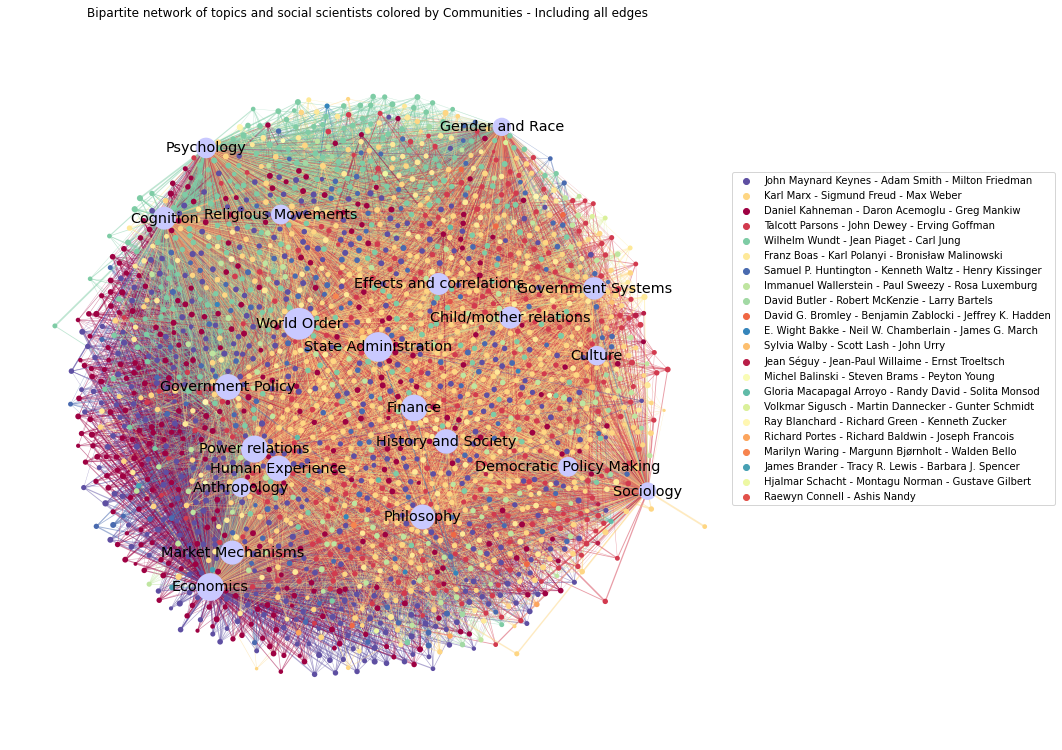

In [28]:
# We initialize a network for communities and draw it with Netwulf
network_communities=redefine_attr(network,HSBM_probs_topics)
fig, ax = nw.draw_netwulf(network_communities, figsize = 10)

# We add labels to Topics 
for i in range(len(network_communities['nodes'])-21,len(network_communities['nodes'])):
    nw.tools.add_node_label(ax,network_communities,network_communities['nodes'][i]['id'],size='x-large')

# We create a color map so nodes in each community gets a unique color
c_map={HSBM_probs_topics['community'][i]:network_communities['nodes'][i]['color']for i in range(len(HSBM_probs_topics['community']))}
c_map['Topics']='#c9c9ff'

# Add legends
for v in c_map.keys():
    plt.scatter([],[],color=c_map[v], 
                label=v, 
                marker='o',
                linestyle="None")
    
# Sort and Place legend
handles, labels = plt.gca().get_legend_handles_labels()
# Get the order of the legend - Based on community size 
order = [labels.index(_com) for _com in list(com_size_dict.keys())]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
           bbox_to_anchor = (1,0.8))
    
# Place legend
plt.title('Bipartite network of topics and social scientists colored by Communities - Including all edges')
plt.savefig('../Plots/bipartite_com_all.png', dpi=200, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

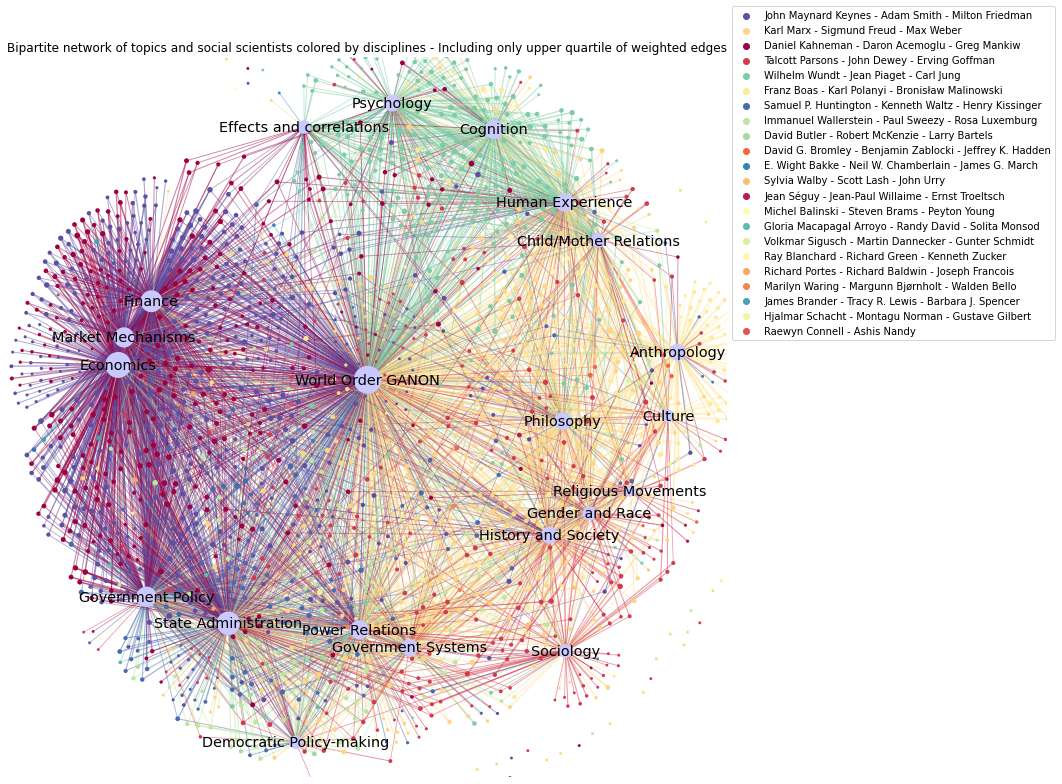

In [45]:
network_communuties_high_weights=redefine_attr(network_high_weights,HSBM_probs_topics)

fig, ax = nw.draw_netwulf(network_communuties_high_weights, figsize = 10)

# Adding labels to Topics 
for i in range(len(network_communuties_high_weights['nodes'])-21,len(network_communuties_high_weights['nodes'])):
    nw.tools.add_node_label(ax,network_communuties_high_weights,network_communuties_high_weights['nodes'][i]['id'],size='x-large')
    
import collections
c_map={HSBM_probs_topics['community'][i]:network_communuties_high_weights['nodes'][i]['color']for i in range(len(HSBM_probs_topics['community']))}
# c_map= collections.OrderedDict(sorted(c_map.items()))
c_map['Topics']='#c9c9ff'

# Add legends
for v in c_map.keys():
    plt.scatter([],[],color=c_map[v], 
                label=v, 
                marker='o',
                linestyle="None")
    
# Sort and Place legend
handles, labels = plt.gca().get_legend_handles_labels()
# Get the order of the legend - Based on community size 
order = [labels.index(_com) for _com in list(com_size_dict.keys())]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
           bbox_to_anchor = (1,0.6))
    
plt.title('Bipartite network of topics and social scientists colored by disciplines - Including only upper quartile of weighted edges')
plt.savefig('../Plots/bipartite_com_up.png', dpi=200, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()



**Topics unite and distinquish disciplines**

worl order, communities er ikke meningsfulde opdelinger ift. topics.

some define, some depart. we show nuances, intersections boundaries 